<a href="https://colab.research.google.com/github/Abhishek-M-B/DSA_Assignments/blob/main/Abhishek_mb_Unsupervised_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
adult_df = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/adult_dataset.csv')
adult_df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


# EDA -- Basic Inspection

In [4]:
adult_df.info()
adult_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [5]:
adult_df.isnull().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


# Drop Duplicates

In [6]:
adult_df.duplicated().sum()

np.int64(16)

In [7]:
adult_df.drop_duplicates(inplace=True)

## Value counts of ecah unique object in Columns

In [8]:
# Identify value_counts in each column

cat_cols = adult_df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(adult_df[col].value_counts(dropna=False))

print("Categorical columns:\n", cat_cols)



Column: workclass
workclass
Private             32205
Self-emp-not-inc     3649
NaN                  3362
Local-gov            2973
State-gov            1877
?                    1763
Self-emp-inc         1624
Federal-gov          1346
Without-pay            18
Never-worked            9
Name: count, dtype: int64

Column: education
education
HS-grad         15780
Some-college    10874
Bachelors        8021
Masters          2657
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           246
Preschool          83
Name: count, dtype: int64

Column: marital-status
marital-status
Married-civ-spouse       22377
Never-married            16105
Divorced                  6631
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: in

In [9]:
adult_df.drop(columns=['education'],inplace=True)

## Replace '?' with NaN

In [10]:
adult_df.replace('?', np.nan, inplace=True)

In [11]:
num_cols = adult_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = adult_df.select_dtypes(include='object').columns

# Median for numerical columns
for col in num_cols:
    adult_df[col].fillna(adult_df[col].median(), inplace=True)

# Mode for categoroical columns
for col in cat_cols:
    adult_df[col].fillna(adult_df[col].mode()[0], inplace=True)


/tmp/ipython-input-1054753939.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_df[col].fillna(adult_df[col].median(), inplace=True)
/tmp/ipython-input-1054753939.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [12]:
adult_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


# Outlier Detection


## IQR

<Axes: >

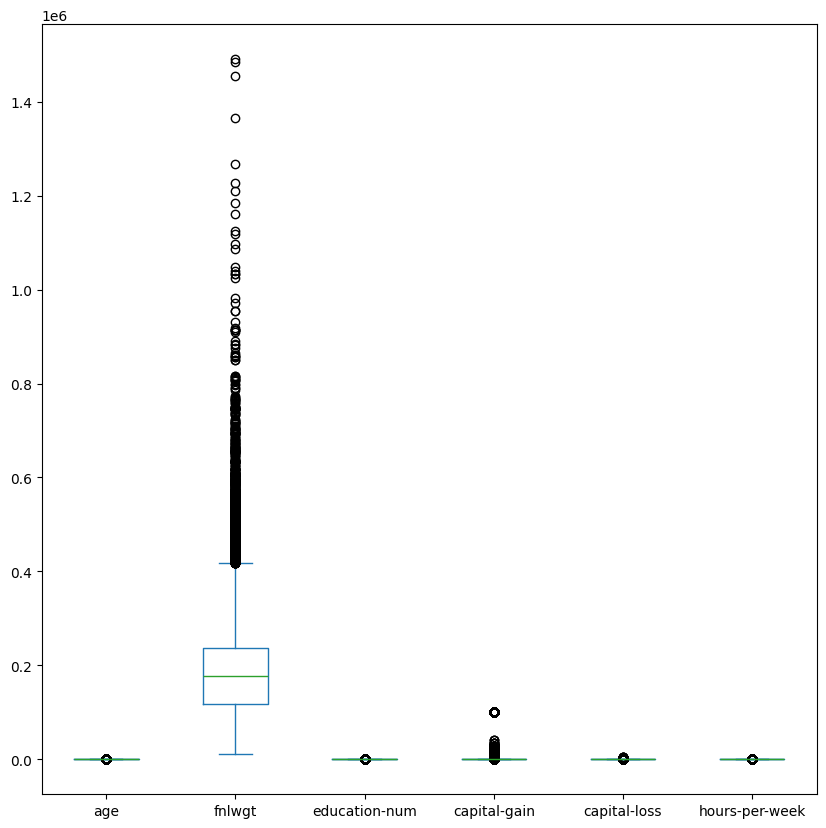

In [13]:
adult_df.plot(kind='box',figsize=(10,10))

In [14]:
for col in num_cols:
    Q1 = adult_df[col].quantile(0.25)
    Q3 = adult_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    adult_df[col] = np.clip(adult_df[col], lower, upper)


<Axes: >

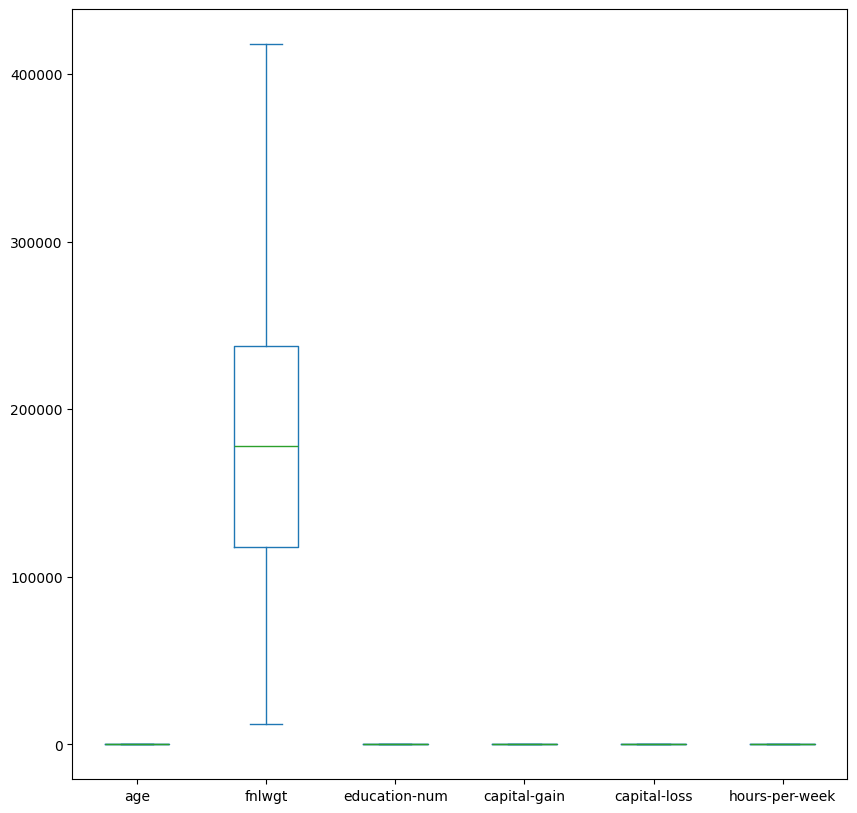

In [15]:
adult_df.plot(kind='box',figsize=(10,10))

# Feature Engineering

## Correlation

In [16]:
adult_df1 = adult_df.select_dtypes(include=['number'])
corr= adult_df1.corr()
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076939,0.041684,NaN,NaN,0.090607
fnlwgt,-0.076939,1.000000,-0.034830,NaN,NaN,-0.018404
education-num,0.041684,-0.034830,1.000000,NaN,NaN,0.177109
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,0.090607,-0.018404,0.177109,NaN,NaN,1.000000


<Axes: >

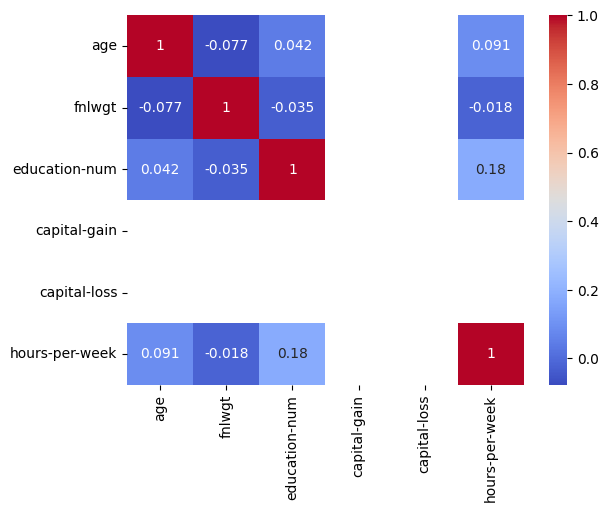

In [17]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [18]:
adult_df.drop(columns=['fnlwgt'], inplace=True)

In [19]:
adult_df['income'] = adult_df['income'].replace('<=50K.', '<=50K')
adult_df['income'] = adult_df['income'].replace('>50K.', '>50K')

In [20]:
adult_df_copy = adult_df.copy()

In [21]:
adult_df_copy.drop(columns=['income'], inplace=True)

# Encoding (text -> number)

In [22]:
# One Hot Encoding beacuse the data is not in an order.
adult_df_encoded = pd.get_dummies(adult_df_copy, drop_first=True)
adult_df_encoded = adult_df_encoded.astype(int)
adult_df_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,32,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


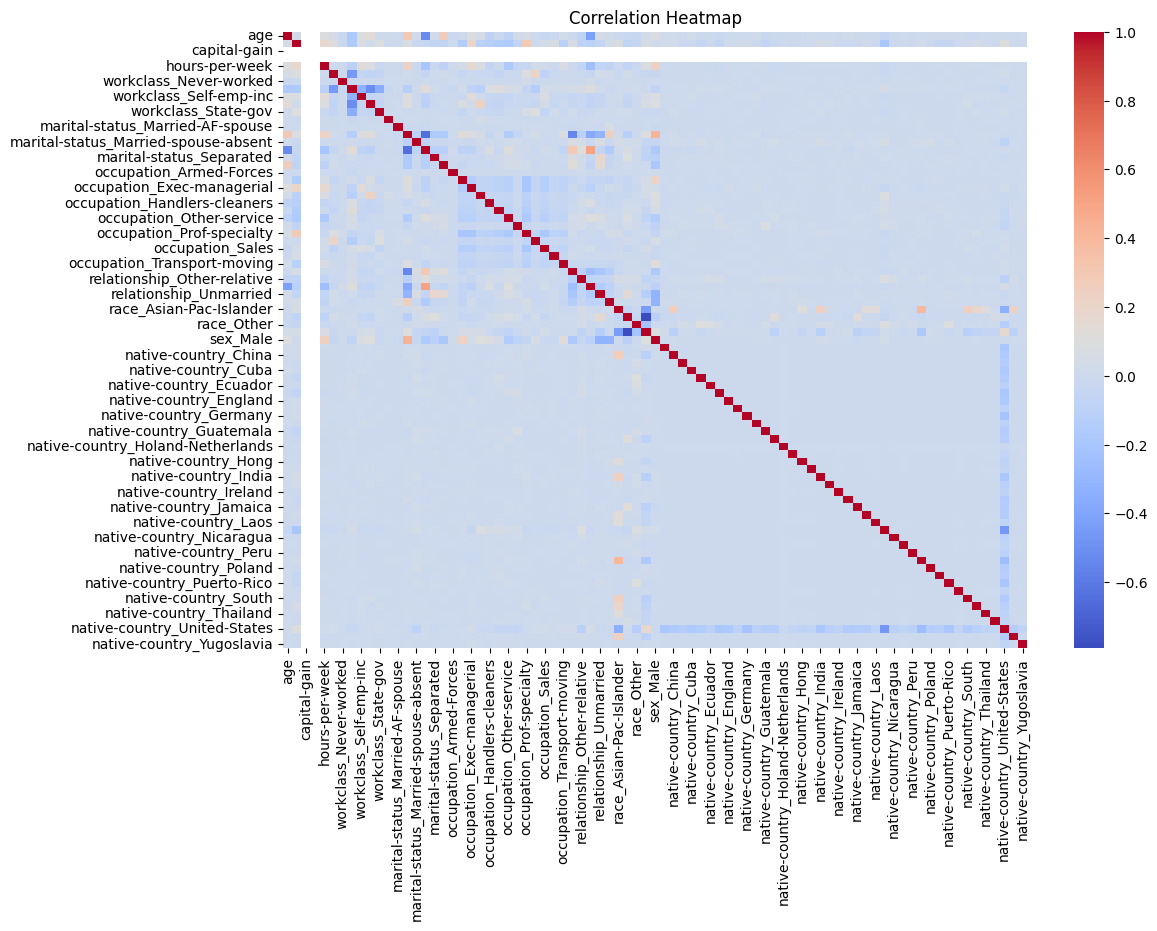

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(adult_df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Scailing

In [24]:
ss = StandardScaler()
adult_df_scaled = ss.fit_transform(adult_df_encoded)

In [25]:
adult_df_scaled = pd.DataFrame(adult_df_scaled, columns=adult_df_encoded.columns)
adult_df_scaled.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.035430,1.158347,0.0,0.0,-0.164944,-0.254632,-0.013578,-1.802003,-0.185487,-0.284203,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
1,0.865015,1.158347,0.0,0.0,-1.485688,-0.254632,-0.013578,-1.802003,-0.185487,3.518615,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
2,-0.039987,-0.441502,0.0,0.0,-0.164944,-0.254632,-0.013578,0.554938,-0.185487,-0.284203,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
3,1.091266,-1.241426,0.0,0.0,-0.164944,-0.254632,-0.013578,0.554938,-0.185487,-0.284203,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,0.296968,-0.041265,-0.021709
4,-0.794155,1.158347,0.0,0.0,-0.164944,-0.254632,-0.013578,0.554938,-0.185487,-0.284203,...,-0.036791,-0.059975,-0.020243,-0.046644,-0.035368,-0.024378,-0.022634,-3.367365,-0.041265,-0.021709


# PCA

In [26]:
pca = PCA().fit(adult_df_scaled)
explained_variance = pca.explained_variance_ratio_

import numpy as np
cum_var = np.cumsum(explained_variance)
print(cum_var)

[0.04055561 0.07180074 0.09845693 0.12239489 0.14403788 0.16479734
 0.18387856 0.20141843 0.21803829 0.23357782 0.24849106 0.26312515
 0.27749885 0.2916621  0.30575936 0.31961048 0.33327243 0.34680592
 0.36031376 0.37365372 0.3869111  0.39999955 0.41291124 0.4257715
 0.43859617 0.45136719 0.46408236 0.47678395 0.48948238 0.5021751
 0.51486355 0.5275484  0.54022912 0.55290806 0.56558669 0.57826226
 0.59093721 0.6036098  0.61628206 0.62895195 0.64162154 0.65428903
 0.66695605 0.67962081 0.69228001 0.70493598 0.71758658 0.73022661
 0.74285146 0.75545439 0.76804717 0.78059322 0.79311223 0.80556692
 0.81799664 0.83040349 0.84273718 0.85491953 0.86697368 0.87888134
 0.89061437 0.90214277 0.9135655  0.9247462  0.93530174 0.94562832
 0.95558814 0.96475233 0.9732966  0.98003157 0.98595703 0.99051419
 0.99457362 0.99707113 0.99852171 0.99935896 0.99983369 0.99995738
 1.         1.         1.        ]


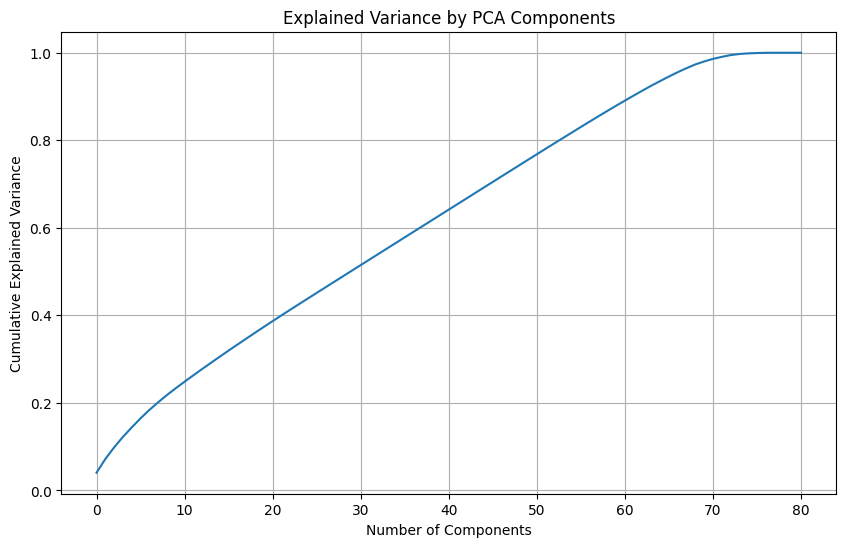

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [28]:
pca = PCA(n_components=0.9) # Retain 90% of the variance
adult_df_pca = pca.fit_transform(adult_df_scaled)

print(f"Number of components retained: {pca.n_components_}")
adult_df_pca = pd.DataFrame(adult_df_pca, columns=[f'PC_{i+1}' for i in range(adult_df_pca.shape[1])])
adult_df_pca.head()

Number of components retained: 62


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62
0,-0.069640,1.043237,-1.906823,1.936834,-0.816459,-1.507260,-0.718796,-0.918334,-0.514851,-0.322290,...,0.590819,0.589293,1.117759,0.750940,-0.992106,-0.452585,-0.691189,-0.307764,0.083557,0.053115
1,2.824697,0.091228,-0.895172,0.614068,-0.149815,-1.250729,0.077043,1.441200,1.060844,0.496325,...,-0.376452,-0.247344,0.237657,-0.259515,0.784253,-0.241108,-0.726041,0.117115,0.387762,0.068492
2,-0.548032,0.871541,1.022283,-0.268981,-0.144922,0.066973,-1.241220,-0.633536,-0.906330,-0.452383,...,-0.426245,-1.149527,-0.474188,1.153875,0.089211,-1.676690,-0.468356,-0.219638,-1.281329,0.227424
3,-0.215613,-1.476800,0.355941,-1.823632,3.524150,-0.056337,-0.515121,-0.890586,-0.198036,0.251188,...,-0.373748,-1.200955,-0.230625,1.351382,0.437929,-1.607299,-0.305410,-0.280098,-0.876856,-0.495753
4,-0.514929,-4.296990,-0.774679,-0.620097,-0.633117,1.223534,3.729072,-2.189900,2.902189,1.493051,...,-2.978770,3.187099,-1.826056,1.351881,0.331151,-0.066646,-1.269962,-1.952777,1.482702,-3.108237


# Machine Learning Model -- Unsupervised

## K-Means Clustering

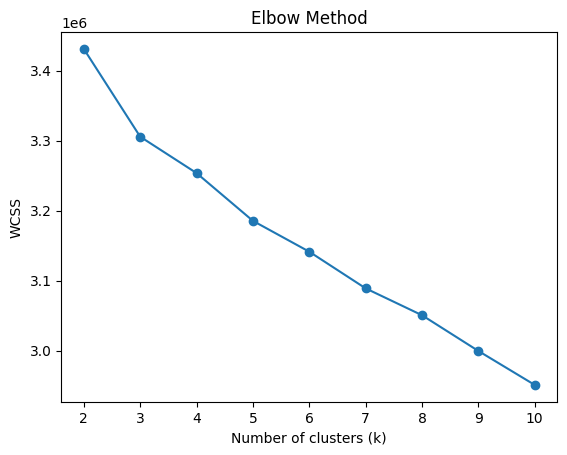

In [29]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adult_df_pca)   # or X_scaled
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [30]:
scores = {}
for k in range(2, 5):  # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(adult_df_pca)
    score = silhouette_score(adult_df_pca, labels)
    scores[k] = score
    print(f"k={k}, silhouette score={score:.3f}")

# Find best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette:", best_k)

k=2, silhouette score=0.874
k=3, silhouette score=0.086
k=4, silhouette score=0.088
Best number of clusters based on silhouette: 2


In [31]:
k = 2  # Best number of clusters based on silhouette: 2

kmeans = KMeans(n_clusters= k, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(adult_df_pca)  # or X_scaled

# Add cluster labels to your dataset
adult_df['kmeans_cluster'] = labels

In [32]:
comparison_df = pd.crosstab(adult_df['kmeans_cluster'], adult_df['income'])
comparison_df

income,<=50K,>50K
kmeans_cluster,,
0,12963,10222
1,24176,1465


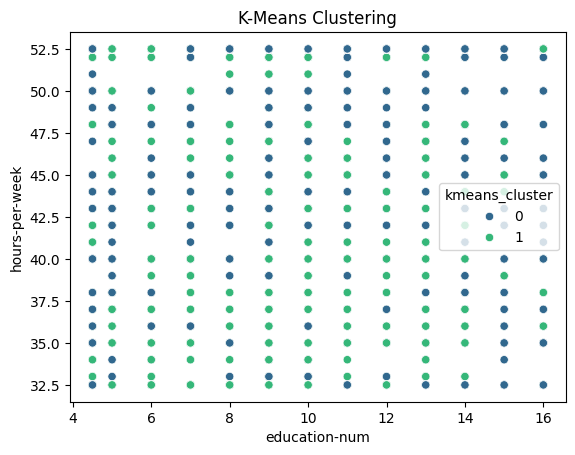

In [33]:
sns.scatterplot(x='education-num',y='hours-per-week',hue='kmeans_cluster',data=adult_df,palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('education-num')
plt.ylabel('hours-per-week')
plt.show()

# Hierarchial Clustering ( Agglomerative clustering )

In [34]:
sample_size = 15000 #  adjust this number based on our memory and visualization needs
X = adult_df_pca.sample(n=min(len(adult_df_pca), sample_size), random_state=42).values

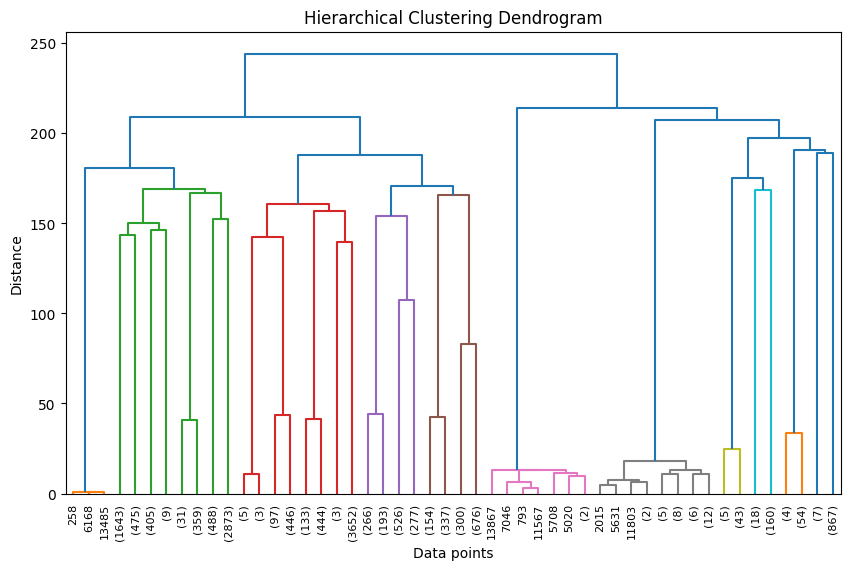

In [35]:
mergings = linkage(X, method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [ ]:
scores = {}
for k in range(2, 5):  # silhouette needs at least 2 clusters
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    scores[k] = sil_score
    print(f"k={k}, silhouette score={sil_score:.3f}")

# Best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette: ", best_k)

In [ ]:
k = best_k # Use the dynamically determined best_k
hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = hc.fit_predict(adult_df_pca) # Apply to the full PCA dataset

# Add cluster labels to dataset
adult_df['hc_cluster'] = labels

In [ ]:
adult_df['hc_cluster'].value_counts()

In [ ]:
adult_df['hc_cluster'].value_counts()

In [ ]:
# How many rows fall into each combination of these two columns
comparison_df =  pd.crosstab(adult_df['hc_cluster'],adult_df['income'])
comparison_df

In [ ]:
sns.scatterplot(x='PC_1',y='PC_2',hue='HC',data=X,palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [ ]:
#Step 1: Choose MinPts
minPts = 5

#Step 2: Fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(adult_df_pca)
distances, indices = neighbors_fit.kneighbors(adult_df_pca)

In [ ]:
#Step 3: Sort distances of the k-th nearest neighbor
distances = np.sort(distances[:, minPts-1])  # take the 14th neighbor distance
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{minPts}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
adult_df['Cluster_dbscan'] = dbscan.fit_predict(adult_df_pca)

In [ ]:
#Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(adult_df['education-num'], adult_df['hours-per-week'], c=adult_df['Cluster_dbscan'], cmap='viridis')
plt.xlabel('education-num')
plt.ylabel('hours-per-week')
plt.title('DBSCAN Clustering of Fish Data')
plt.show()
adult_df['Cluster_dbscan'].value_counts()